In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline #make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC

## Задача 1.

Поиграемся с датасетом про диабет (он совсем легкий).

Целевая переменная тут явно обозначена как Class variable (очевидно, есть у человека диабет или нет)

In [8]:
!wget https://raw.githubusercontent.com/rsuh-python/mag2024ML/refs/heads/main/03-LinearClassification/Diabetes%20Binary%20Classification.csv

--2025-03-18 19:20:21--  https://raw.githubusercontent.com/rsuh-python/mag2024ML/refs/heads/main/03-LinearClassification/Diabetes%20Binary%20Classification.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23584 (23K) [text/plain]
Saving to: ‘Diabetes Binary Classification.csv’

Diabetes Binary Cla 100%[===================>]  23.03K  --.-KB/s    in 0s      

2025-03-18 19:20:21 (88.1 MB/s) - ‘Diabetes Binary Classification.csv’ saved [23584/23584]



In [10]:
data = pd.read_csv('Diabetes Binary Classification.csv')
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [12]:
data.describe() # наивно полагаю, что много полезной инфы (:

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

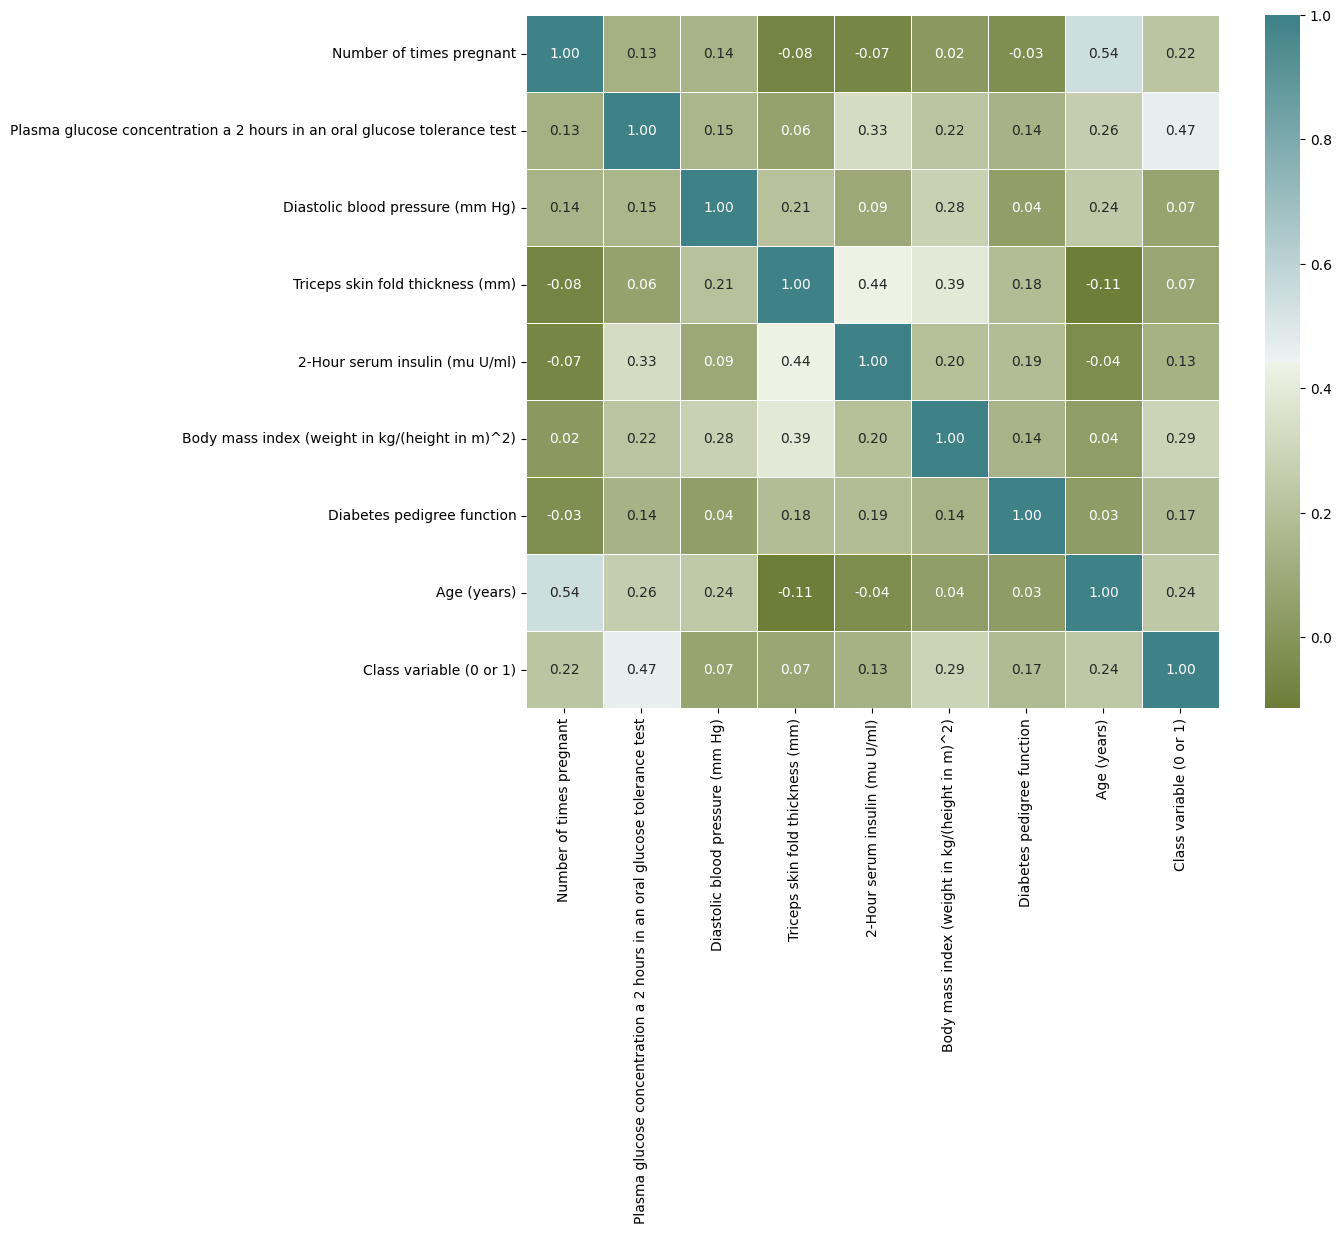

In [16]:
plt.figure(figsize=(12,9))
corr = data.corr()

sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [18]:
X = data.drop(columns=['Class variable (0 or 1)'])
y = data['Class variable (0 or 1)']

scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

Xtrain, Xtest, ytrain, ytest = train_test_split(Xscaled, y, test_size=0.2, random_state=42)

In [23]:
model = LogisticRegression()
model.fit(Xtrain, ytrain)

ypred = model.predict(Xtest)

accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7532


In [25]:
print(classification_report(ytest, ypred)) # как-будто хочется лучше

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



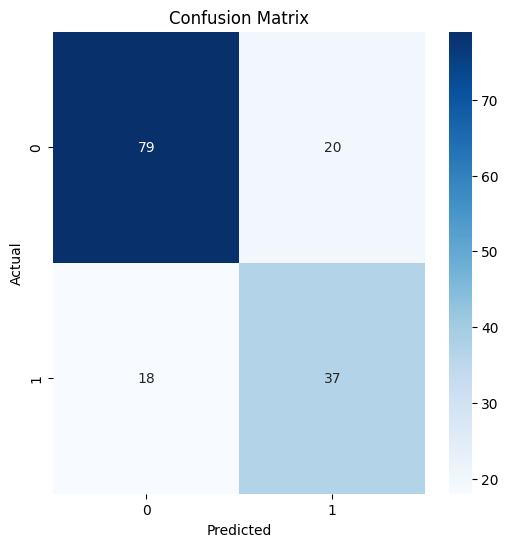

In [24]:
# пробую отрисовку матрицы ошибок
cm = confusion_matrix(ytest, ypred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Задача 2.

Второй датасет - про покупателей велосипедов.

Пытаемся по характеристикам человека понять, купит он велик или нет.

In [26]:
!wget https://raw.githubusercontent.com/rsuh-python/mag2024ML/refs/heads/main/03-LinearClassification/bike_buyers_clean.csv

--2025-03-18 19:41:19--  https://raw.githubusercontent.com/rsuh-python/mag2024ML/refs/heads/main/03-LinearClassification/bike_buyers_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86348 (84K) [text/plain]
Saving to: ‘bike_buyers_clean.csv’

bike_buyers_clean.c 100%[===================>]  84.32K  --.-KB/s    in 0.01s   

2025-03-18 19:41:19 (6.47 MB/s) - ‘bike_buyers_clean.csv’ saved [86348/86348]



In [80]:
data = pd.read_csv('bike_buyers_clean.csv')
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(8)
memory usage: 101.7+ KB


In [82]:
data = pd.get_dummies(data, columns=['Marital Status', 'Home Owner', 'Gender'], drop_first=True)
data.drop(columns=['ID'], inplace=True)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Income                 1000 non-null   int64 
 1   Children               1000 non-null   int64 
 2   Education              1000 non-null   object
 3   Occupation             1000 non-null   object
 4   Cars                   1000 non-null   int64 
 5   Commute Distance       1000 non-null   object
 6   Region                 1000 non-null   object
 7   Age                    1000 non-null   int64 
 8   Purchased Bike         1000 non-null   object
 9   Marital Status_Single  1000 non-null   bool  
 10  Home Owner_Yes         1000 non-null   bool  
 11  Gender_Male            1000 non-null   bool  
dtypes: bool(3), int64(4), object(5)
memory usage: 73.4+ KB


In [85]:
data['Purchased Bike'] = data['Purchased Bike'].map({'Yes': 1, 'No': 0})

In [86]:
X = data.drop(columns=['Purchased Bike'])
y = data['Purchased Bike']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['Education', 'Occupation', 'Commute Distance', 'Region']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), ['Age', 'Income', 'Children', 'Cars'])
    ])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', class_weight='balanced'))
])

In [87]:
model_pipeline.fit(Xtrain, ytrain)

ypred = model_pipeline.predict(Xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       106
           1       0.58      0.56      0.57        94

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.60      0.60      0.60       200

